In [1]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#file_csv = '/Users/jubba/Downloads/Which_Horse_Concat.csv'

In [ ]:
# df_raw_data = pd.read_csv('/Users/jubba/which_horse/raw_data/combined_flat2_csv.csv')
# df_raw_data

In [2]:
from pipeline_cleaning import clean_data, transforming_data
df_raw_data = pd.read_csv('/Users/jubba/which_horse/raw_data/final_df.csv')
df_cleaned = clean_data(df_raw_data.copy())
df_transformed_train, df_transformed_val, df_transformed_test = transforming_data(df_cleaned.copy())

/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_22034/2045535521.py:2: DtypeWarning: Columns (53,62,71,80,89,98,107,116,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_data = pd.read_csv('/Users/jubba/which_horse/raw_data/final_df.csv')
/Users/jubba/which_horse/notebook/pipeline_cleaning.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['finish_position'].fillna(df['Place'], inplace=True)
/Users/jubba/which_horse/notebook/pipeline_cleaning.py:36: FutureWarning: Setti

In [3]:
df_transformed_train.columns

Index(['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Lis

In [ ]:
#classifcation X and Y
#X = df.drop(columns=['win_or_lose', 'date', 'birth_date', 'finish_position', 'failed_to_finish_reason'])
#y = df['win_or_lose']

In [ ]:
# Regression X and Y
#X = df.drop(columns=['betfair_starting_price', 'date', 'birth_date'])
#y = df['betfair_starting_price']

In [ ]:
# #temporary drop, values will be imputed


In [ ]:
#X['margin'].isnull().sum()

In [ ]:
#X.columns[X.isna().any()]

In [ ]:
#list(X.isnull().sum())

In [ ]:
#y = y.replace({0.5 : 1})

In [ ]:
'''mask_1 = df_raw_data['win_or_lose'] == 1
print(mask_1.sum())
mask_0 = df_raw_data['win_or_lose'] == 0
print(mask_0.sum())
wins = 23087
loses = 184016
print(wins / (wins+loses) * 100)
print(loses / (wins+loses) * 100)'''

In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
categories = ['Wins', 'Losses']
values = [wins, loses]
bar_width = 0.35
bar_positions =[0,1]
plt.bar(bar_positions, values, bar_width, color=['blue', 'red'], tick_label = categories)
plt.title('Wins and Losses')
plt.xlabel('Outcome')
plt.ylabel('Count')

MISSING DATA AND RAW DATA SET

Text(0.5, 0, 'count')

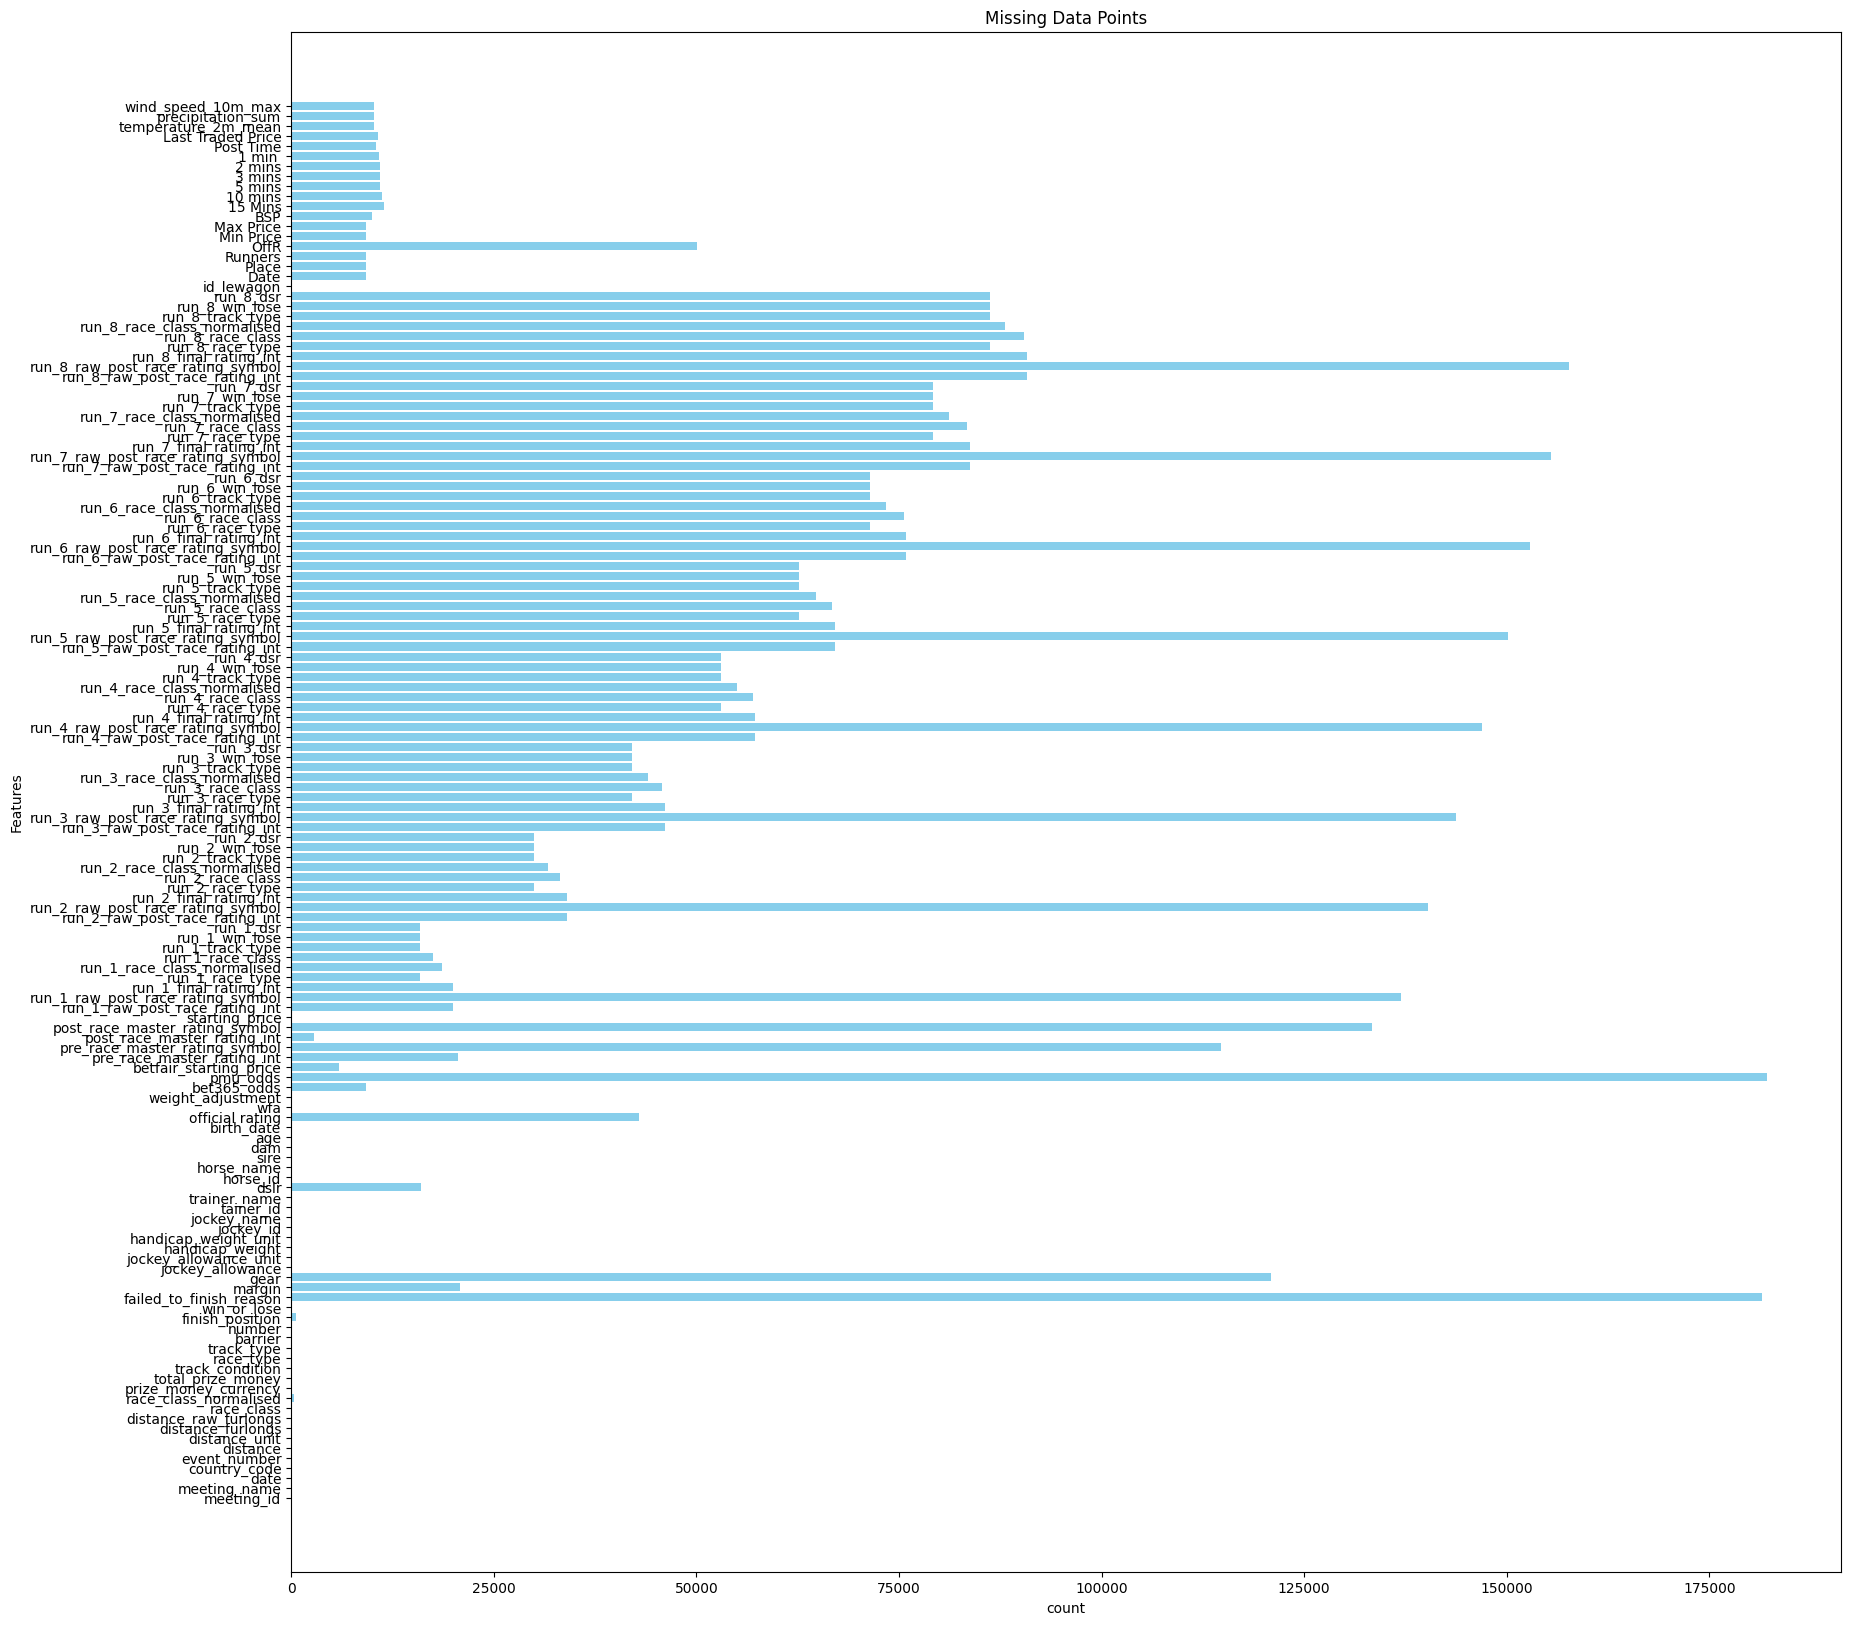

In [185]:
missing_values_dict = dict(df_raw_data.isnull().sum())
features = list(missing_values_dict.keys())
missing_counts = list(missing_values_dict.values())
plt.figure(figsize=(20, 20))
plt.barh(features, missing_counts, color='skyblue')
plt.title('Missing Data Points')
plt.ylabel('Features')
plt.xlabel('count')

In [41]:
df_raw_data_wins = df_raw_data[df_raw_data['win_or_lose'] == 1]

In [43]:
import matplotlib.pyplot as plt

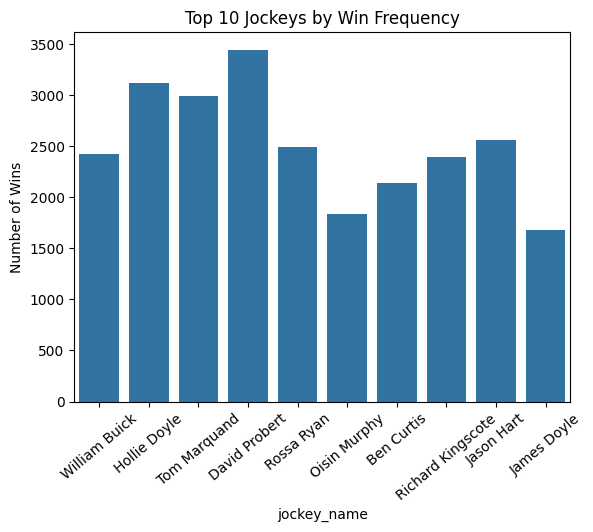

In [44]:
sns.countplot(data=df_raw_data, x='jockey_name', order=df_raw_data_wins['jockey_name'].value_counts().index[:10])
plt.title('Top 10 Jockeys by Win Frequency')
plt.xlabel('jockey_name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=40)
plt.show()

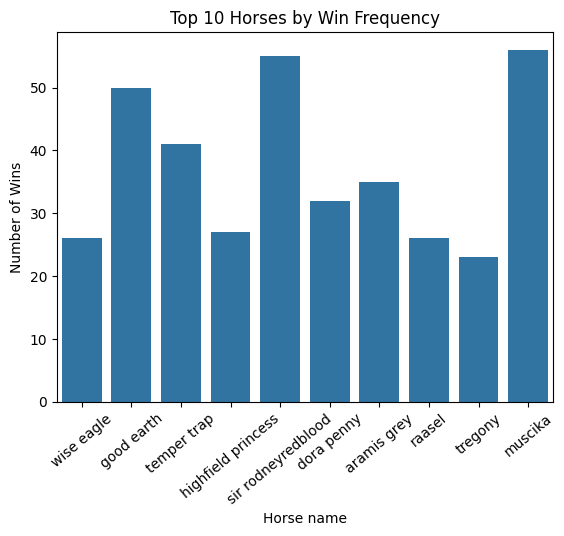

In [186]:
sns.countplot(data=df_raw_data, x='horse_name', order=df_raw_data_wins['horse_name'].value_counts().index[:10])
plt.title('Top 10 Horses by Win Frequency')
plt.xlabel('Horse name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=40)
plt.show()

In [45]:
df_raw_data.groupby(by=['horse_name']).agg({'win_or_lose': 'sum', 'horse_id': 'count'}).sort_values(by='win_or_lose', ascending=False).head(10)#.plot(kind='bar')

,win_or_lose,horse_id
horse_name,,
good earth,11.0,50
wise eagle,11.0,26
temper trap,10.0,41
highfield princess,10.0,27
sir rodneyredblood,10.0,55
dora penny,10.0,32
gweedore,9.5,37
baaeed,9.0,10
raasel,9.0,26


In [ ]:
df_cleaned.columns

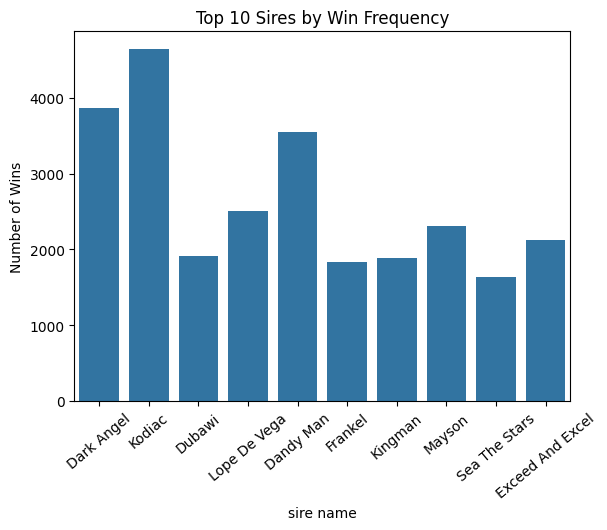

In [187]:
sns.countplot(data=df_raw_data, x='sire', order=df_raw_data_wins['sire'].value_counts().index[:10])
plt.title('Top 10 Sires by Win Frequency')
plt.xlabel('sire name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=40)
plt.show()

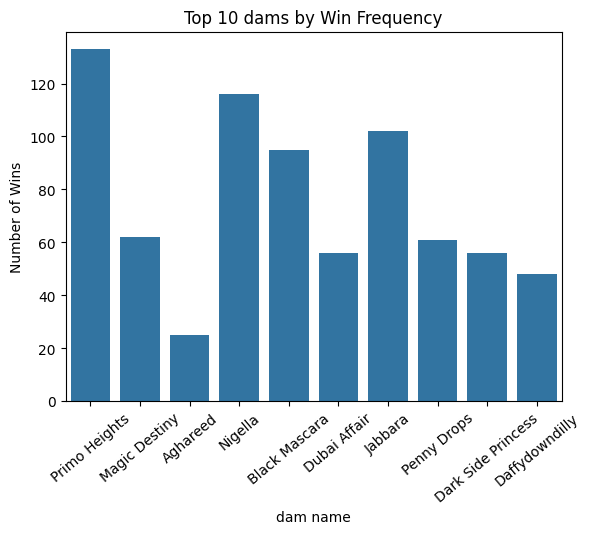

In [188]:
sns.countplot(data=df_raw_data, x='dam', order=df_raw_data_wins['dam'].value_counts().index[:10])
plt.title('Top 10 dams by Win Frequency')
plt.xlabel('dam name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=40)
plt.show()

In [ ]:
#we have no performance metric as a feature

In [189]:
sns.boxplot(data=df_cleaned, x='current_age', y='official rating', color='orange')
plt.title('Relationship between Horse Age and official rating')
plt.xlabel('Age')
plt.ylabel('official Rating')
plt.show()

ValueError: Could not interpret value `official rating` for `y`. An entry with this name does not appear in `data`.

In [ ]:
df_cleaned.columns

/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_22034/1013879154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='viridis')
/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_22034/1013879154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='viridis')
/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_22034/1013879154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='viridis')
/var/folders/y1/7l27jz

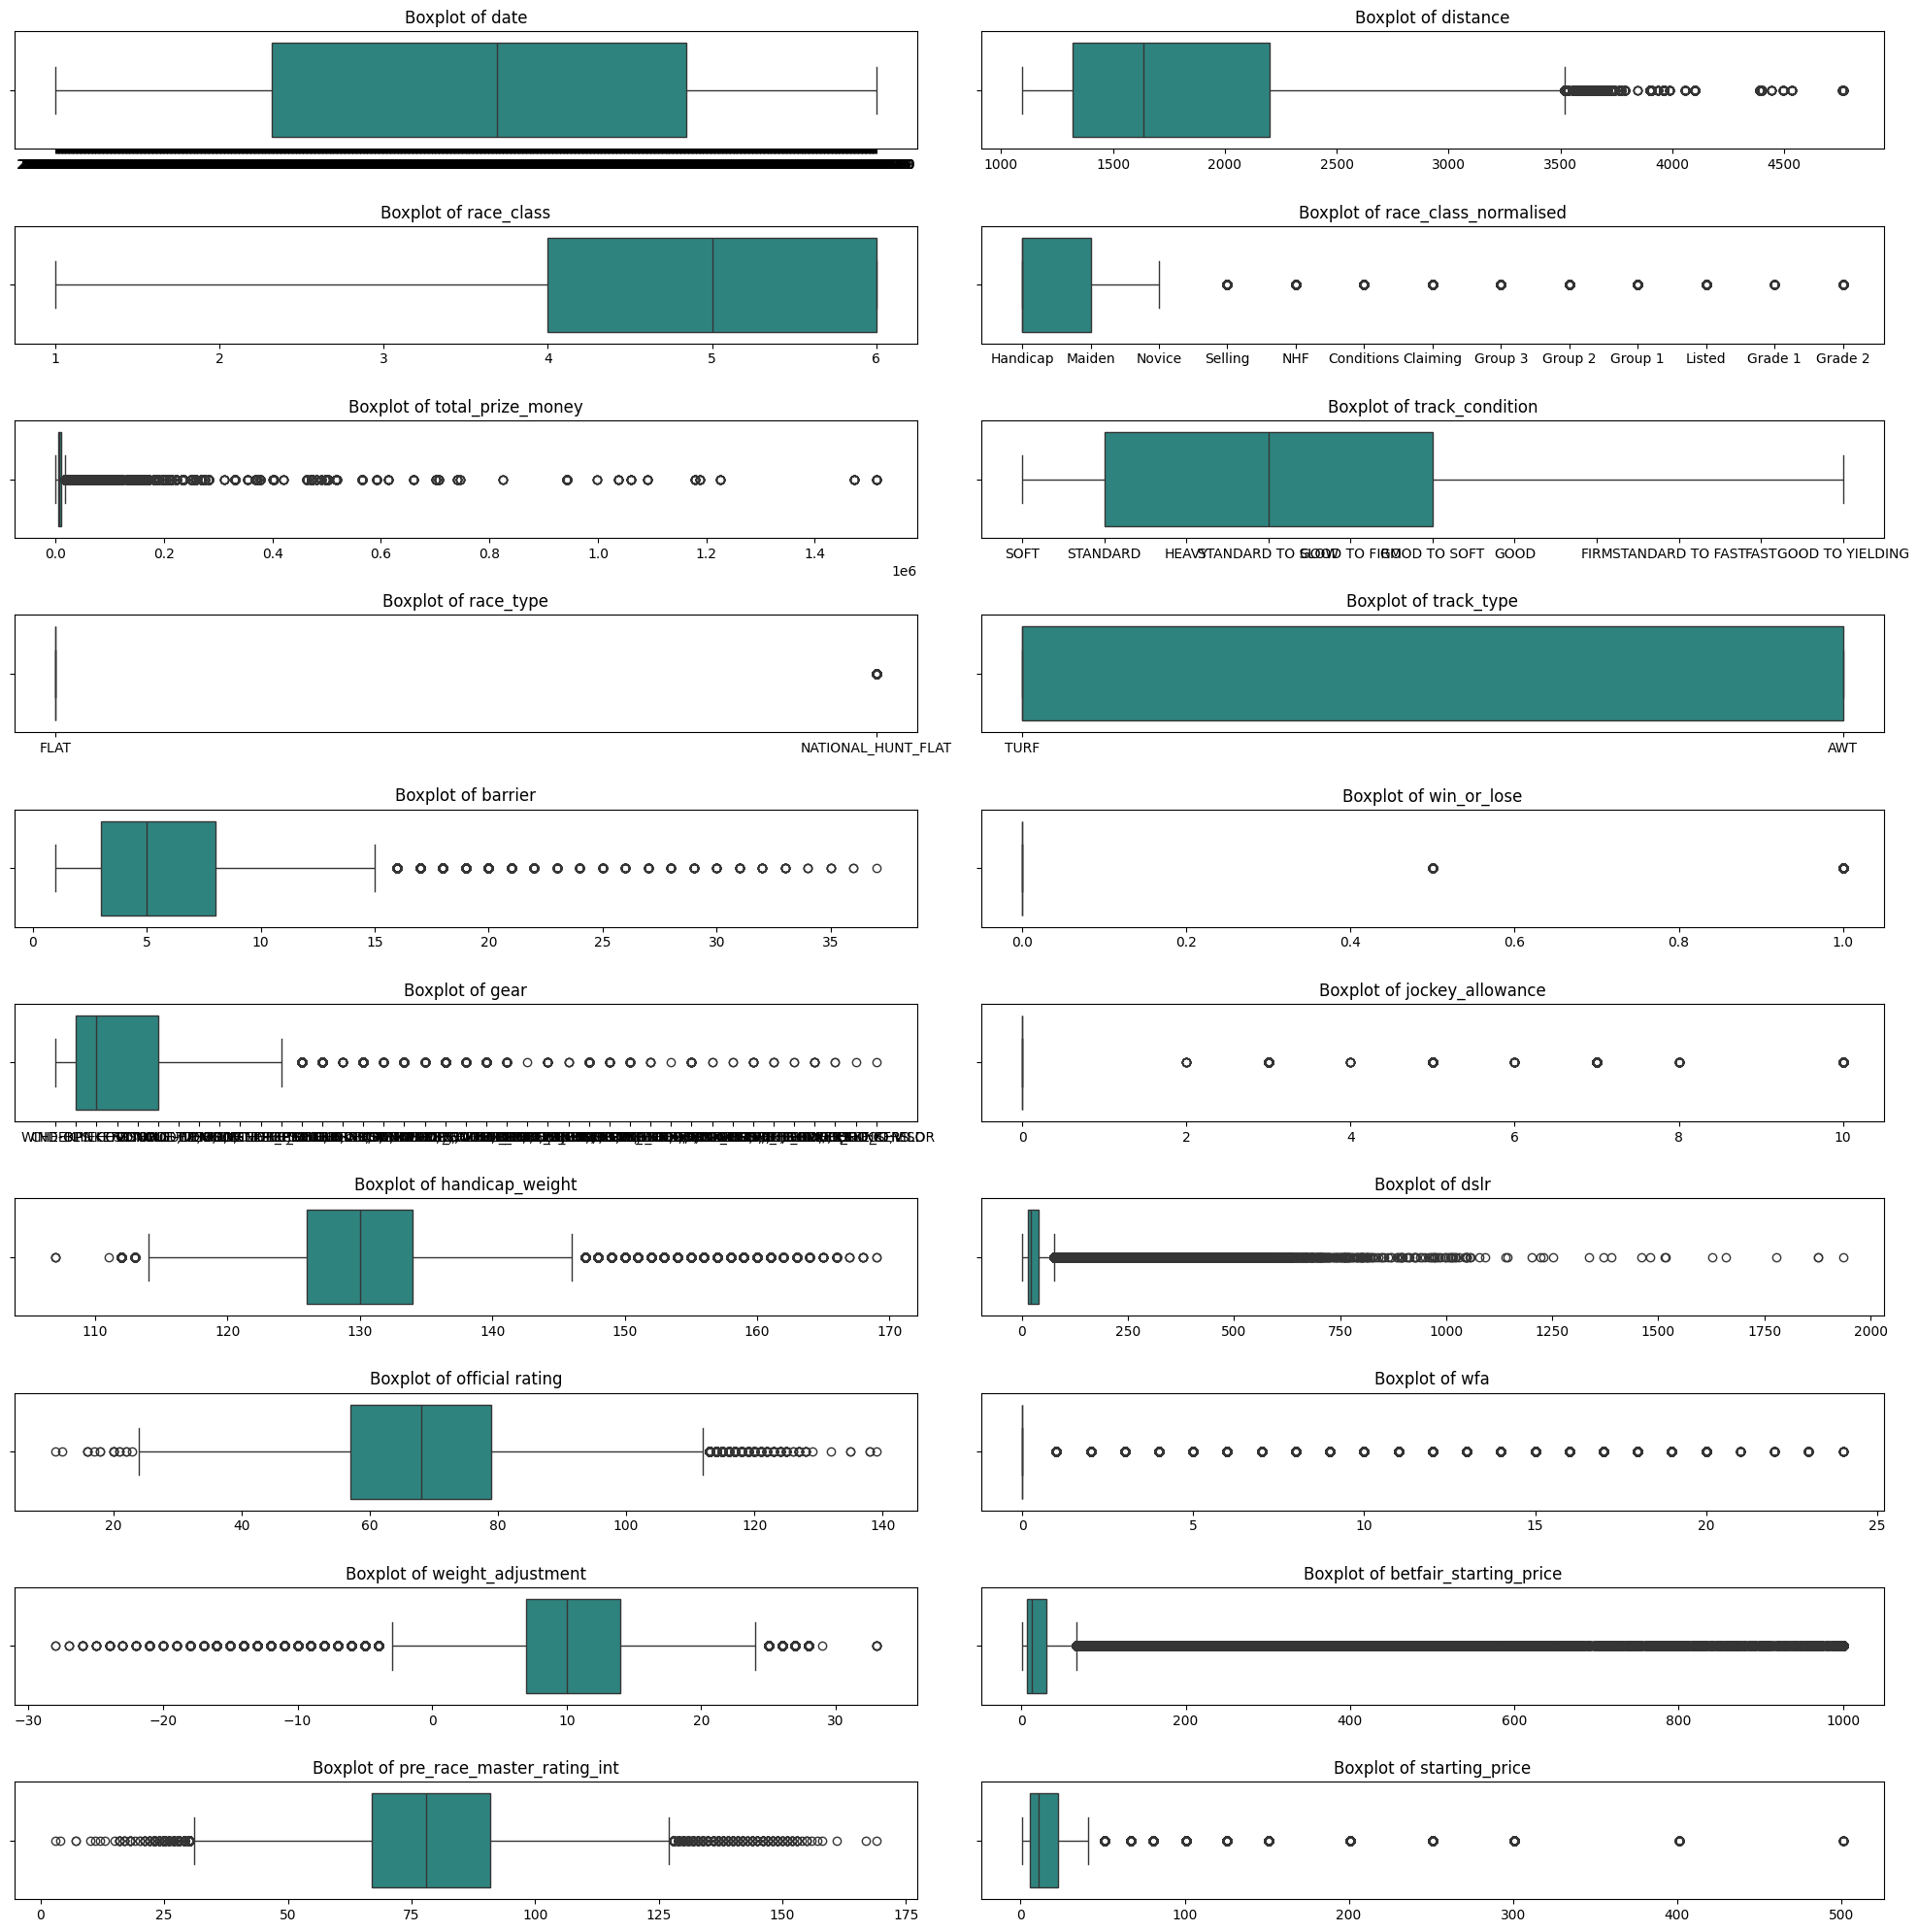

In [190]:
relevant_features = ['date', 'distance', 'race_class', 'race_class_normalised',
       'total_prize_money', 'track_condition', 'race_type', 'track_type',
       'barrier', 'win_or_lose', 'gear', 'jockey_allowance', 'handicap_weight',
       'dslr', 'official rating', 'wfa', 'weight_adjustment',
       'betfair_starting_price', 'pre_race_master_rating_int',
       'starting_price']
df_subset = df_raw_data[relevant_features]
plt.figure(figsize=(20, 20))
for i, feature in enumerate(relevant_features):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(x=feature, data=df_subset, palette='viridis')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


In [191]:
relevant_features = ['date', 'distance', 'race_class', 'race_class_normalised',
       'total_prize_money', 'track_condition', 'race_type', 'track_type',
       'barrier', 'win_or_lose', 'gear', 'jockey_allowance', 'handicap_weight',
       'dslr', 'official rating', 'wfa', 'weight_adjustment',
       'betfair_starting_price', 'pre_race_master_rating_int',
       'starting_price']
df_subset = df_cleaned[relevant_features]
plt.figure(figsize=(20, 20))
for i, feature in enumerate(relevant_features):
    plt.subplot(12, 2, i + 1)
    sns.boxplot(x=feature, data=df_subset, palette='Set2')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

KeyError: "['official rating', 'betfair_starting_price'] not in index"

In [ ]:
correlation_matrix = df_raw_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
df_cleaned.columns

In [ ]:
df_cleaned[df_cleaned]

In [ ]:
X = df_cleaned[['distance',
       'total_prize_money',
       'barrier', 'win_or_lose', 'gear', 'jockey_allowance',
       'dslr', 'official rating', 'wfa', 'weight_adjustment',
       'betfair_starting_price', 'pre_race_master_rating_int',
       'starting_price']]

In [ ]:
inertia = []
distortions = []
for k in range(1, 11, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
plt.plot(range(1,11), inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
distortions

In [ ]:
inertia

In [ ]:
k

In [ ]:
plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
inertia_values

In [ ]:
X.iloc[:,0]

In [ ]:

import matplotlib.pyplot as plt

k_range = range(1, 5)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel(f'{X.columns[0]}')
    plt.ylabel(f'{X.columns[1]}')
    plt.show()
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler # cant be used as too much data is loss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy=1, n_jobs=-1)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
mask_win_synthetic = y_res == 1
print(mask_win_synthetic.sum())
mask_lose_synthetic = y_res == 0
print(mask_lose_synthetic.sum())


In [ ]:
y.nunique()

In [ ]:
X.columns

In [8]:
"""['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Listed',
       'race_class_normalised_Maiden', 'race_class_normalised_NHF',
       'race_class_normalised_Novice', 'race_class_normalised_Selling',
       'race_class_1', 'race_class_2', 'race_class_3', 'race_class_4',
       'race_class_5', 'race_class_6', 'distance', 'total_prize_money',
       'jockey_allowance', 'handicap_weight', 'wfa', 'weight_adjustment',
       'bsp', 'starting_price', 'current_age', 'min_price', 'max_price',
       'runners', 'temperature_2m_mean', 'precipitation_sum',
       'wind_speed_10m_max', 'win_or_lose', 'gear', 'place', '15_mins',
       '10_mins', '5_mins', '3_mins', '2_mins', '1_min_']"""

"['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',\n       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',\n       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',\n       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',\n       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',\n       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',\n       'track_condition_HEAVY', 'track_condition_SOFT',\n       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',\n       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',\n       'track_type_TURF', 'race_class_normalised_Claiming',\n       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',\n       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',\n       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',\n       'race_class_normalised_Handicap', 'race_class_normal

In [175]:
X_train = df_transformed_train.drop(columns=['bsp', 'place', '15_mins',
       '10_mins', '5_mins', '3_mins', '2_mins', '1_min_'])
X_test = df_transformed_test.drop(columns=['bsp', 'place', '15_mins',
       '10_mins', '5_mins', '3_mins', '2_mins', '1_min_'])
y_train = df_transformed_train['1_min_']
y_test = df_transformed_test['1_min_']
y_train_winorlose  = ['win_or_lose']
#X_val = df_transformed_val[]
#y_val = df_transformed_val[]

In [ ]:
#xgbclassifierwere going to use becausewhethera horse loses or wins is biunary classificatiojn

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


In [ ]:
model = xgb.XGBClassifier(
    tree_method='hist',
    booster='gbtree',
    objective='reg:logistic',
    random_state=42,
    learning_rate=0.001,
    colsample_bytree=0.9,
    n_estimators=110,
    subsample=0.75
    )

In [ ]:
from keras.utils import get_custom_objects
import tensorflow as tf
from keras import backend as K
import numpy as np

In [ ]:
X_train.dtypes

In [ ]:
y_train

In [ ]:
# def custom_loss_function(y_pred, y_true):


    # win_horse = y_true[:, 0]
    # win_odds = y_true[:, 1]
    # gain_loss_vector = win_horse * (win_odds - 1) + (1 - win_horse) * -1
    # y_true = y_true.reshape(-1,1)
    # return -0.1 * y_true * y_pred
    # return -0.1 * np.mean(np.sum(y_true * y_pred))
    #return -1 * tf.reduce_mean(tf.reduce_sum(gain_loss_vector * y_pred, axis=1))
    # gain_loss_vector = K.concatenate([win_horse * (win_odds - 1) + (1 - win_horse) * -1, -> profit or loss of winning/losing on a bet of £1
    # K.zeros_like(win_odds)], axis=1) -> this is padding as y_true is longer then y_pred


In [ ]:
df_transformed_train.columns

In [11]:
def custom_loss_function(y_true, y_pred):
  """Custom loss function for XGBoost with gradient and hessian.

  Args:
      y_true: Ground truth labels (numpy array).
      y_pred: Predicted values by the model (numpy array).

  Returns:
      grad: A numpy array of gradients for each data point.
      hess: A numpy array of hessians for each data point.
  """
  y_true = y_true.reshape(-1,1)
#   y_pred = y_pred.reshape(-1,1)
  loss = -0.1 * np.mean(y_true * y_pred, axis=0)  # Mean across features

  # Calculate gradients (assuming y_true has the same shape as y_pred)
  grad = -0.1 * y_true * np.mean(y_pred, axis=0)  # Mean across features

  # Calculate hessians (assuming y_true has the same shape as y_pred)
#   hess = 0.1 * np.mean(y_true**2, axis=0)  # Mean across features
#   hess = np.repeat(hess, len(grad))
  hess = 0.1 * np.square(y_true - np.mean(y_pred, axis=0))

  return grad, hess

In [177]:
X_train1 = X_train.drop(columns='win_or_lose')

In [180]:
X_train1.columns

Index(['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Lis

In [182]:
winloss_model = xgb.XGBRegressor(objective='binary:logistic')
winloss_model.fit(X_train1, y_train_winorlose)

XGBoostError: [17:53:38] /Users/runner/work/xgboost/xgboost/src/c_api/../data/array_interface.h:492: Unicode-1 is not supported.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000285a30994 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000285a42aec xgboost::ArrayInterface<2, false>::AssignType(xgboost::StringView) + 1272
  [bt] (2) 3   libxgboost.dylib                    0x0000000285a4225c xgboost::ArrayInterface<2, false>::Initialize(std::__1::map<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, xgboost::Json, std::__1::less<void>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const, xgboost::Json>>> const&) + 156
  [bt] (3) 4   libxgboost.dylib                    0x0000000285af1874 xgboost::ArrayInterface<2, false>::ArrayInterface(xgboost::Json const&) + 404
  [bt] (4) 5   libxgboost.dylib                    0x0000000285aedf5c void xgboost::(anonymous namespace)::CopyTensorInfoImpl<2, float>(xgboost::Context const&, xgboost::Json, xgboost::linalg::Tensor<float, 2>*) + 44
  [bt] (5) 6   libxgboost.dylib                    0x0000000285aed0fc xgboost::MetaInfo::SetInfoFromHost(xgboost::Context const&, xgboost::StringView, xgboost::Json) + 476
  [bt] (6) 7   libxgboost.dylib                    0x0000000285aecdc4 xgboost::MetaInfo::SetInfo(xgboost::Context const&, xgboost::StringView, xgboost::StringView) + 164
  [bt] (7) 8   libxgboost.dylib                    0x0000000285a47688 XGDMatrixSetInfoFromInterface + 224
  [bt] (8) 9   libffi.dylib                        0x000000019a93b050 ffi_call_SYSV + 80



In [166]:
model_regressor =xgb.XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            booster='dart',
            learning_rate=0.1,
            max_depth=3,
            min_child_weight=2,
            gamma=0.2,
            subsample=0.6,
            enable_categorical = True
                                )

In [163]:
X_train

,barrier_1,barrier_2,barrier_3,barrier_4,barrier_5,barrier_6,barrier_7,barrier_8,barrier_9,barrier_10,...,starting_price,current_age,min_price,max_price,runners,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,win_or_lose,gear
0,0,0,1,0,0,0,0,0,0,0,...,0.085578,-0.118245,0.167277,0.425851,-0.678297,0.995120,-0.317643,-1.096076,0.0,0.0
1,0,0,0,1,0,0,0,0,0,0,...,0.981491,0.207861,0.612941,0.425851,-0.048197,0.742134,-0.566062,-0.795570,0.0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,0.981491,0.207861,0.309079,0.425851,-0.363247,-0.094664,1.769083,1.808814,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.981491,0.207861,0.207792,0.425851,0.266853,0.255623,-0.566062,-0.454997,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,-0.515626,-1.422670,-0.288414,-2.573518,-0.678297,-1.651499,-0.441852,-0.475030,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73396,0,0,0,0,0,0,0,0,0,0,...,-0.397743,-0.444351,-0.223691,0.425851,0.266853,1.442709,-0.566062,-0.434963,0.0,1.0
73397,0,1,0,0,0,0,0,0,0,0,...,0.604265,0.533967,0.714228,0.425851,-0.048197,0.742134,-0.541220,1.929016,0.0,0.0
73398,0,0,0,0,0,0,0,0,0,0,...,-0.103035,0.533967,-0.223691,0.274977,0.266853,0.275084,2.613709,1.989117,0.0,0.0
73399,0,0,0,0,0,0,0,0,1,0,...,-0.421320,1.186179,-0.229768,0.425851,-0.363247,-0.191967,-0.590904,-0.374862,0.0,0.0


In [167]:
model_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [171]:
list(y_test)

[8.4,
 15.5,
 21.0,
 4.5,
 6.0,
 4.4,
 11.5,
 16.5,
 5.5,
 3.1,
 15.5,
 17.0,
 75.0,
 13.0,
 17.0,
 7.0,
 4.5,
 5.4,
 13.5,
 8.4,
 150.0,
 730.0,
 40.0,
 50.0,
 16.0,
 65.0,
 44.0,
 85.0,
 11.5,
 10.5,
 10.5,
 100.0,
 48.0,
 36.0,
 6.4,
 10.0,
 44.0,
 19.5,
 5.8,
 5.5,
 14.0,
 5.4,
 8.8,
 2.04,
 22.0,
 190.0,
 5.0,
 360.0,
 1.62,
 14.5,
 75.0,
 16.5,
 170.0,
 17.0,
 4.8,
 2.84,
 2.24,
 8.6,
 3.45,
 5.4,
 2.58,
 6.0,
 11.5,
 25.0,
 13.5,
 46.0,
 7.2,
 9.4,
 4.6,
 4.2,
 2.24,
 5.5,
 3.65,
 4.2,
 9.0,
 7.0,
 10.0,
 7.8,
 14.5,
 8.2,
 3.85,
 5.5,
 10.0,
 9.4,
 11.0,
 34.0,
 11.0,
 4.3,
 11.0,
 8.8,
 22.0,
 3.4,
 5.4,
 6.0,
 7.4,
 13.5,
 9.8,
 19.5,
 8.0,
 9.8,
 90.0,
 810.0,
 170.0,
 65.0,
 16.5,
 6.2,
 9.6,
 14.5,
 12.0,
 16.0,
 10.5,
 12.0,
 26.0,
 13.0,
 3.55,
 12.0,
 5.4,
 8.0,
 13.5,
 14.0,
 32.0,
 55.0,
 19.0,
 48.0,
 17.5,
 11.0,
 8.2,
 7.0,
 17.0,
 15.5,
 44.0,
 25.0,
 16.0,
 9.8,
 60.0,
 6.4,
 8.8,
 14.5,
 7.8,
 9.6,
 140.0,
 55.0,
 17.5,
 15.0,
 55.0,
 20.0,
 22.0,
 10.5,
 4.8,
 

In [173]:
list(y_pred)

[8.0673065,
 16.099228,
 16.052147,
 4.556534,
 6.203964,
 5.397808,
 12.38871,
 16.283237,
 5.387909,
 4.2035675,
 16.31314,
 14.041946,
 85.32579,
 14.016296,
 15.394627,
 6.735115,
 4.923668,
 5.964596,
 13.626717,
 7.900406,
 236.85986,
 454.20285,
 49.679405,
 39.97588,
 15.839718,
 87.830444,
 51.58745,
 62.956852,
 10.931412,
 9.177238,
 9.6453705,
 114.896454,
 50.292164,
 34.34003,
 7.1331253,
 11.1154785,
 61.841984,
 15.555424,
 5.857559,
 5.2750206,
 12.95845,
 5.5375023,
 8.275711,
 4.0300827,
 21.438755,
 213.93901,
 4.6218987,
 729.2228,
 4.299259,
 15.335583,
 51.436054,
 13.952671,
 193.19637,
 15.442135,
 4.49485,
 3.7401505,
 3.6419945,
 7.92939,
 3.7672844,
 5.7442703,
 3.7401505,
 5.7442703,
 11.759609,
 26.832413,
 15.811901,
 65.707535,
 7.2906494,
 8.954266,
 5.489395,
 5.047306,
 4.397415,
 5.6480675,
 3.9915504,
 4.605213,
 8.633511,
 6.6162643,
 10.631615,
 7.630623,
 12.775566,
 7.92939,
 4.003086,
 5.2072983,
 12.108395,
 8.817482,
 10.476028,
 34.14525,
 1

In [183]:
import numpy as np

y_pred = model_regressor.predict(X_test)
np.unique(y_pred)

array([   3.2782402,    3.337284 ,    3.3830528, ..., 1018.95166  ,
       1026.0968   , 1056.5952   ], dtype=float32)

In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
print(f"mae: {mae}, mse: {mse}, rmse: {rmse}, r_sqaured: {r_squared}")

mae: 8.370099784009666, mse: 1149.9754395216826, rmse: 33.91128778919613, r_sqaured: 0.9077291650384587


/Users/jubba/.pyenv/versions/3.10.6/envs/which_horse/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
from sklearn.model_selection import cross_validate

In [29]:
cv_results = cross_validate(model_regressor, X_train, y_train, cv=5)

In [30]:
cv_results

{'fit_time': array([0.1894536 , 0.16185284, 0.20395637, 0.18502378, 0.17807007]),
 'score_time': array([0.00828528, 0.00739813, 0.00676298, 0.00683904, 0.00730109]),
 'test_score': array([0.77213512, 0.78778631, 0.78536506, 0.78824454, 0.77930456])}

In [36]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
param_grid = {
    'tree_method': ['exact', 'hist'],
    'booster': ['gbtree', 'dart'],
    'learning_rate' : [0.001, 0.01],
            }

In [38]:
regressor_paramgrid = {
    'booster': ['gbtree'],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_child_weight': [1],
    'gamma': [0],
    'subsample': [0.6],
    'colsample_bytree': [0.6]
                      }

In [51]:

grid_search_regressor = GridSearchCV(estimator=model_regressor, param_grid=regressor_paramgrid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
grid_search_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/jubba/.pyenv/versions/3.10.6/envs/which_horse/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jubba/.pyenv/versions/3.10.6/envs/which_horse/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/jubba/.pyenv/versions/3.10.6/envs/which_horse/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/jubba/.pyenv/versions/3.10.6/envs/which_horse/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/jubba/.pyenv/versions/3.10.6/envs/which_horse/lib/p

[CV 2/5] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=0.6;, score=nan total time=   0.5s
[CV 4/5] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=0.6;, score=nan total time=   0.5s
[CV 5/5] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=0.6;, score=nan total time=   0.5s
[CV 1/5] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=0.6;, score=nan total time=   0.5s
[CV 3/5] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=0.6;, score=nan total time=   0.5s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=0.2,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.01...
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.6],
                         'gamma': [0], 'learning_rate': [0.01],
                         'max_depth': [3], 'min_child_weight': [1],
                         'subsample': [0.6]},
             scoring='accuracy', verbose=3)

In [ ]:
'''es = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
        )'''

In [ ]:
xgb_classifier = xgb.XGBClassifier(objective='reg:logistic', random_state=42)
grid_search = GridSearchCV(estimator=xgb_classifier, refit='precision', param_grid= param_grid, cv=5, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

In [ ]:
'''
param_grid = {
    'tree_method': ['exact', 'approx', 'hist'],
    'booster': ['gbtree', 'dart'],
    'learning_rate' : [0.001, 0.01, 0.1],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [100, 150, 200],
    'subsample': [0.7, 0.75, 0.8]
            }'''

In [53]:
best_params = f"best_params {grid_search_regressor.best_params_}"
best_score = f"best_score {grid_search_regressor.best_score_}"
cv_results = grid_search_regressor.cv_results_

In [54]:
best_params

"best_params {'booster': 'gbtree', 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}"

In [55]:
best_score

'best_score nan'

In [56]:
cv_results

{'mean_fit_time': array([0.46966805]),
 'std_fit_time': array([0.01033708]),
 'mean_score_time': array([0.01694059]),
 'std_score_time': array([0.00397097]),
 'param_booster': masked_array(data=['gbtree'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_colsample_bytree': masked_array(data=[0.6],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_subsample': masked_array(data=[0.6],
              mask=[False],
       

In [ ]:
print(cv_results)

In [ ]:
cv_results.keys()

In [ ]:
cv_results['mean_test_recall']

In [59]:
df_transformed_train.columns

Index(['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Lis